# Synthetic Financial Datasets For Fraud Detection

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import numpy as np
import requests



### 1: Load The Credit Card Data


In [3]:
df = pd.read_csv('C:\Projects\SpringBoard\Capstone 1\Credit card\\Synthetic credit card.csv')

In [4]:
df.head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


 ### 2: Number Of Missing Values By Column

In [6]:
missing = pd.concat([df.isna().sum(axis=1), 100 * df.isna().mean(axis=1)], axis=1)
missing.columns=["count", '%']
missing.sort_values(by="count", ascending=False)

,count,%
0,0,0.0
4241732,0,0.0
4241754,0,0.0
4241753,0,0.0
4241752,0,0.0
...,...,...
2120869,0,0.0
2120868,0,0.0
2120867,0,0.0
2120866,0,0.0


### 3: Categorical Features

In [23]:
df.select_dtypes('object')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


 ### 4: Unique Names

In [7]:
df['nameOrig'].value_counts().head()

C363736674     3
C1065307291    3
C1784010646    3
C1530544995    3
C2098525306    3
Name: nameOrig, dtype: int64

 ####  4.1 Check the name duplicated with the destination.
  Concatenate the string columns 'nameOrig' and 'nameDest' and count the values again (as above)

In [8]:
#Concatenate the string columns 'nameOrig' and 'nameDest' and count the values again (as above)
(df['nameOrig'] + ', ' + df['nameDest']).value_counts().head()

C191227330, M244544971      1
C1379874050, C1168480718    1
C719767398, C1669577717     1
C1279948880, C322841310     1
C1715505816, C1582446273    1
dtype: int64

In [9]:

df[df['nameOrig'] == 'C271870491']       

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5584506,394,PAYMENT,24397.6,C271870491,74615.0,50217.4,M1616091300,0.0,0.0,0,0


In [10]:
df[df['nameOrig'] == 'C400299098']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
53297,9,PAYMENT,2142.13,C400299098,91105.15,88963.02,M885272395,0.00,0.00,0,0
1109407,130,PAYMENT,17257.53,C400299098,0.00,0.00,M1721640115,0.00,0.00,0,0
2181883,185,CASH_IN,120008.43,C400299098,15872727.23,15992735.66,C11496787,1482696.02,1362687.59,0,0


There are three data in one nameOrig, but they are clearly three different transactions.

 ### 5: The relationship between oldbalanceOrg and oldbalanceDest / newbalanceOrig and newbalanceDest

In [11]:
(df.oldbalanceDest != df.newbalanceDest).value_counts()

True     4045328
False    2317292
dtype: int64

In [12]:
(df.oldbalanceOrg!= df.newbalanceOrig).value_counts()

True     4273583
False    2089037
dtype: int64

In [13]:
#Filter the dataframe for rows where 'newbalanceOrig' and 'oldbalanceOrg' are different,
#group that by 'newbalanceOrig' and perform `value_counts` on the 'oldbalanceOrg'
(df[df.newbalanceOrig != df.oldbalanceOrg]
 .groupby('oldbalanceOrg')['newbalanceOrig']
.value_counts())

oldbalanceOrg  newbalanceOrig
0.00           85553.24          2
               99453.68          2
               133652.30         2
               5.44              1
               16.89             1
                                ..
47316255.05    37316255.05       1
49585040.37    39585040.37       1
50399045.08    40399045.08       1
57316255.05    47316255.05       1
59585040.37    49585040.37       1
Name: newbalanceOrig, Length: 3078784, dtype: int64

In [14]:
#Filter the dataframe for rows where 'newbalanceDest' and 'oldbalanceDest' are different,
#group that by 'newbalanceOrig' and perform `value_counts` on the 'oldbalanceOrg'
(df[df.newbalanceOrig != df.oldbalanceOrg]
 .groupby('newbalanceDest')['oldbalanceDest']
.value_counts())

newbalanceDest  oldbalanceDest
0.000000e+00    0.000000e+00      1542991
                1.980000e+02           11
                1.620000e+02           10
                1.930000e+02           10
                1.060000e+02            9
                                   ...   
3.279630e+08    3.278521e+08            1
3.279981e+08    3.281945e+08            1
3.281945e+08    3.279630e+08            1
3.551855e+08    3.553814e+08            1
3.553814e+08    3.555534e+08            1
Name: oldbalanceDest, Length: 2722052, dtype: int64

In [15]:
df[['newbalanceOrig', 'oldbalanceOrg']].nunique()

newbalanceOrig    2682586
oldbalanceOrg     1845844
dtype: int64

In [16]:
df[['newbalanceDest', 'oldbalanceDest']].nunique()

newbalanceDest    3555499
oldbalanceDest    3614697
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


array([[<AxesSubplot:title={'center':'step'}>,
        <AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'oldbalanceOrg'}>],
       [<AxesSubplot:title={'center':'newbalanceOrig'}>,
        <AxesSubplot:title={'center':'oldbalanceDest'}>,
        <AxesSubplot:title={'center':'newbalanceDest'}>],
       [<AxesSubplot:title={'center':'isFraud'}>,
        <AxesSubplot:title={'center':'isFlaggedFraud'}>, <AxesSubplot:>]],
      dtype=object)

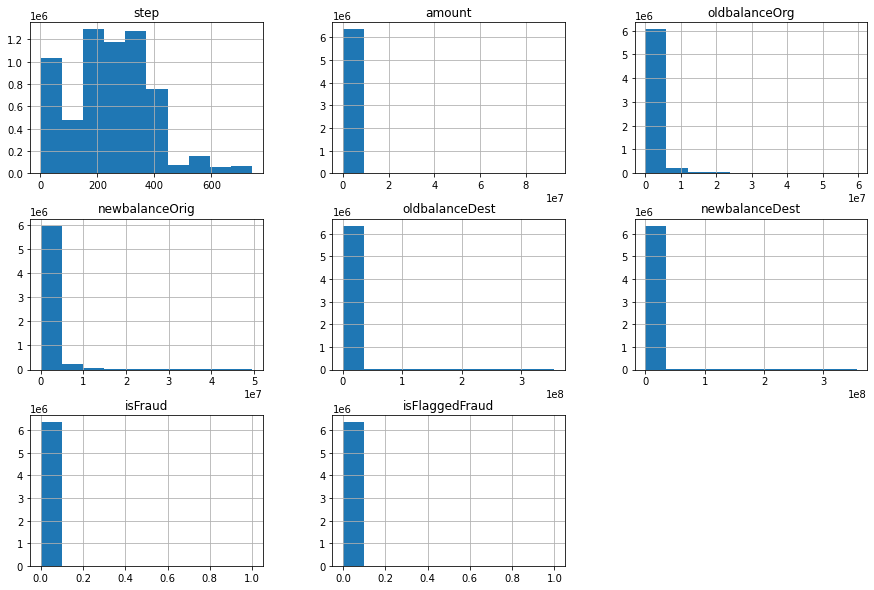

In [15]:
df.hist(figsize=(15,10))

In [11]:
df[df['isFraud'] > 0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [14]:
df[df['isFlaggedFraud'] > 0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [20]:
df[df['amount'] == 0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0


In [21]:
(df[df['amount'] == 0].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 2736447 to 6362585
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16 non-null     int64  
 1   type            16 non-null     object 
 2   amount          16 non-null     float64
 3   nameOrig        16 non-null     object 
 4   oldbalanceOrg   16 non-null     float64
 5   newbalanceOrig  16 non-null     float64
 6   nameDest        16 non-null     object 
 7   oldbalanceDest  16 non-null     float64
 8   newbalanceDest  16 non-null     float64
 9   isFraud         16 non-null     int64  
 10  isFlaggedFraud  16 non-null     int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.5+ KB


In [24]:
df.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,
0,243.235663,1.781970e+05,8.328287e+05,855970.228109,1.101421e+06,1.224926e+06,0.000000
1,368.413856,1.467967e+06,1.649668e+06,192392.631836,5.442496e+05,1.279708e+06,0.001948
